In [632]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import fbeta_score, recall_score

In [633]:
# Loading dataset 
data = pd.read_csv('./data/Dataset.csv')#[1000:]


C:\Users\yoges\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1,7,8,16,17,18,19,20,35) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [634]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121856 non-null  int64  
 1   Client_Income               118249 non-null  object 
 2   Car_Owned                   118275 non-null  float64
 3   Bike_Owned                  118232 non-null  float64
 4   Active_Loan                 118221 non-null  float64
 5   House_Own                   118195 non-null  float64
 6   Child_Count                 118218 non-null  float64
 7   Credit_Amount               118224 non-null  object 
 8   Loan_Annuity                117044 non-null  object 
 9   Accompany_Client            120110 non-null  object 
 10  Client_Income_Type          118155 non-null  object 
 11  Client_Education            118211 non-null  object 
 12  Client_Marital_Status       118383 non-null  object 
 13  Client_Gender 

In [635]:
data.describe()

,ID,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Score_Source_1,Score_Source_2,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
count,1.218560e+05,118275.000000,118232.000000,118221.000000,118195.000000,118218.000000,41761.000000,121856.000000,121856.000000,121856.000000,119446.000000,119447.000000,119428.000000,118193.000000,53021.000000,116170.000000,59928.000000,118192.000000,103316.000000,121856.000000
mean,1.216093e+07,0.342854,0.332262,0.499175,0.692060,0.417779,12.157324,0.999992,0.200499,0.281201,2.154329,2.030038,3.159736,12.063100,0.501213,0.518625,0.117428,962.106056,1.891082,0.080792
std,3.517694e+04,0.474665,0.471026,0.500001,0.461644,0.728802,12.056079,0.002865,0.400375,0.449587,0.912686,0.504407,1.759045,3.280695,0.211204,0.740248,0.107974,827.976726,1.861921,0.272517
min,1.210000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.014568,0.000005,0.000000,0.000000,0.000000,0.000000
25%,1.213046e+07,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.333481,0.390164,0.057700,272.000000,0.000000,0.000000
50%,1.216093e+07,0.000000,0.000000,0.000000,1.000000,0.000000,9.000000,1.000000,0.000000,0.000000,2.000000,2.000000,3.000000,12.000000,0.504657,0.564978,0.088700,755.000000,1.000000,0.000000
75%,1.219139e+07,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,1.000000,0.000000,1.000000,3.000000,2.000000,5.000000,14.000000,0.673890,0.664011,0.148500,1570.000000,3.000000,0.000000
max,1.222186e+07,1.000000,1.000000,1.000000,1.000000,19.000000,69.000000,1.000000,1.000000,1.000000,16.000000,3.000000,6.000000,23.000000,0.945741,100.000000,1.000000,4185.000000,22.000000,1.000000


In [636]:
data.head()

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,...,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,...,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,...,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,...,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,...,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0


In [637]:
numeric_columns = ['Client_Income', 'Credit_Amount', 'Loan_Annuity', 'Age_Days', 'Employed_Days', 
                   'Registration_Days', 'ID_Days', 'Score_Source_3', 'Population_Region_Relative']

# Converting each numeric column from object to numeric data type
for column in numeric_columns:
    data[column] = pd.to_numeric(data[column], errors='coerce')

print(data.dtypes)

ID                              int64
Client_Income                 float64
Car_Owned                     float64
Bike_Owned                    float64
Active_Loan                   float64
House_Own                     float64
Child_Count                   float64
Credit_Amount                 float64
Loan_Annuity                  float64
Accompany_Client               object
Client_Income_Type             object
Client_Education               object
Client_Marital_Status          object
Client_Gender                  object
Loan_Contract_Type             object
Client_Housing_Type            object
Population_Region_Relative    float64
Age_Days                      float64
Employed_Days                 float64
Registration_Days             float64
ID_Days                       float64
Own_House_Age                 float64
Mobile_Tag                      int64
Homephone_Tag                   int64
Workphone_Working               int64
Client_Occupation              object
Client_Famil

In [638]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121856 non-null  int64  
 1   Client_Income               118234 non-null  float64
 2   Car_Owned                   118275 non-null  float64
 3   Bike_Owned                  118232 non-null  float64
 4   Active_Loan                 118221 non-null  float64
 5   House_Own                   118195 non-null  float64
 6   Child_Count                 118218 non-null  float64
 7   Credit_Amount               118219 non-null  float64
 8   Loan_Annuity                117030 non-null  float64
 9   Accompany_Client            120110 non-null  object 
 10  Client_Income_Type          118155 non-null  object 
 11  Client_Education            118211 non-null  object 
 12  Client_Marital_Status       118383 non-null  object 
 13  Client_Gender 

In [639]:
import numpy as np
import pandas as pd

def detect_outliers_zscore(df, threshold=3):
    outliers = {}
    for column in df.columns:
        z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())
        column_outliers = np.where(z_scores > threshold)[0]
        if len(column_outliers) > 0:
            outliers[column] = column_outliers
    return outliers

numeric_features = data.select_dtypes(include=['int64', 'float64']).columns
outliers_zscore = detect_outliers_zscore(data[numeric_features])

# Printing columns with outliers
for column, indices in outliers_zscore.items():
    print(f"'{column}',")

'Client_Income',
'Child_Count',
'Credit_Amount',
'Loan_Annuity',
'Population_Region_Relative',
'Registration_Days',
'Own_House_Age',
'Mobile_Tag',
'Client_Family_Members',
'Application_Process_Hour',
'Score_Source_2',
'Social_Circle_Default',
'Phone_Change',
'Credit_Bureau',
'Default',


In [640]:
import numpy as np

def handle_outliers(df, columns, threshold=3):
    df_outliers = df.copy()

    for column in columns:
        z_scores = np.abs((df_outliers[column] - df_outliers[column].mean()) / df_outliers[column].std())
        df_outliers[column][z_scores > threshold] = np.nan

    return df_outliers

data = handle_outliers(data, columns=['Client_Income',
'Child_Count',
'Credit_Amount',
'Loan_Annuity',
'Population_Region_Relative',
'Registration_Days',
'Own_House_Age',
'Mobile_Tag',
'Client_Family_Members',
'Application_Process_Hour',
'Score_Source_2',
'Social_Circle_Default',
'Phone_Change',
'Credit_Bureau'], threshold=3)


<ipython-input-640-c8af44b9c27b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outliers[column][z_scores > threshold] = np.nan
<ipython-input-640-c8af44b9c27b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outliers[column][z_scores > threshold] = np.nan
<ipython-input-640-c8af44b9c27b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outliers[column][z_scores > threshold] = np.nan
<ipython-input-640-c8af44b9c27b>:8: Sett

In [641]:
outliers_zscore = detect_outliers_zscore(data[numeric_features])

for column, indices in outliers_zscore.items():
    print(f"'{column}',")

'Client_Income',
'Credit_Amount',
'Loan_Annuity',
'Population_Region_Relative',
'Registration_Days',
'Own_House_Age',
'Social_Circle_Default',
'Phone_Change',
'Credit_Bureau',
'Default',


In [642]:
# Feature engineering to create new features 
# Age_Bins
bins = [0, 30, 60, 1000]
labels = ['Young', 'Adult', 'Senior']
data['Age_Group'] = pd.cut(data['Age_Days'], bins=bins, labels=labels, right=False)

# Income_Per_Family_Member
data['Income_Per_Family_Member'] = data['Client_Income'] / data['Client_Family_Members']

# Employed_Percentage
data['Employed_Percentage'] = data['Employed_Days'] / data['Age_Days']

# Registration_Age
data['Registration_Age'] = data['Age_Days'] - data['Registration_Days']

# ID_Change
data['ID_Change'] = data['Registration_Days'] - data['ID_Days']

# House_Own_Age_Ratio
data['House_Own_Age_Ratio'] = data['Own_House_Age'] / data['Age_Days']

# Credit_Bureau_Frequency
data['Credit_Bureau_Frequency'] = data['Credit_Bureau'] / (data['Age_Days'] / 365)

# Education_Level_Order
education_mapping = {'None': 0, 'Lower secondary': 1, 'Secondary': 2, 'Incomplete higher': 3, 'Higher education': 4, 'Academic degree': 5}

# Population_Region_Ratio
data['Population_Region_Ratio'] = data['Population_Region_Relative'] * data['Age_Days']

# Loan_Annuity_Percent
data['Loan_Annuity_Percent'] = (data['Loan_Annuity'] / data['Client_Income']) * 100

# Relative_Score
data['Relative_Score'] = data[['Score_Source_1', 'Score_Source_2', 'Score_Source_3']].mean(axis=1)


In [643]:
corr = data.corrwith(data['Default'])
print(corr.sort_values(ascending=False))

Default                       1.000000
House_Own_Age_Ratio           0.065056
Cleint_City_Rating            0.058857
Own_House_Age                 0.048143
Credit_Bureau_Frequency       0.036068
Homephone_Tag                 0.021593
Child_Count                   0.019222
Credit_Bureau                 0.017382
Loan_Annuity_Percent          0.017027
Client_Family_Members         0.008937
Application_Process_Day       0.005693
ID                            0.000432
Bike_Owned                    0.000431
Active_Loan                   0.000240
House_Own                    -0.001011
Loan_Annuity                 -0.006662
ID_Change                    -0.015120
Income_Per_Family_Member     -0.015640
Client_Income                -0.022704
Car_Owned                    -0.023221
Application_Process_Hour     -0.023637
Workphone_Working            -0.025682
Credit_Amount                -0.026566
Population_Region_Relative   -0.034820
Social_Circle_Default        -0.034839
Registration_Days        

In [644]:
# Feature engineering
# Assuming 'loan_status' is the target variable, drop irrelevant columns and split data into features (X) and target variable (y)
data = data.drop(['ID'], axis=1)
X = data.drop(['Default'], axis=1)
y = data['Default']

In [645]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [646]:
# Preprocessing
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [647]:
categorical_columns_temp = [
    'ID','Accompany_Client', 'Car_Owned', 'Bike_Owned', 'Active_Loan', 'House_Own', 'Child_Count', 
    'Accompany_Client', 'Client_Income_Type', 'Client_Education', 'Client_Marital_Status', 
    'Client_Gender', 'Loan_Contract_Type', 'Client_Housing_Type', 'Mobile_Tag', 
    'Homephone_Tag', 'Workphone_Working', 'Client_Occupation', 'Client_Permanent_Match_Tag', 
    'Client_Contact_Work_Tag', 'Type_Organization', 'Default'
]
quantitative_columns = [
    'Client_Income', 'Credit_Amount', 'Loan_Annuity', 'Population_Region_Relative', 
    'Age_Days', 'Employed_Days', 'Registration_Days', 'ID_Days', 'Own_House_Age', 
    'Client_Family_Members', 'Application_Process_Day', 
    'Application_Process_Hour', 'Score_Source_1', 'Score_Source_2', 'Score_Source_3', 
    'Social_Circle_Default', 'Phone_Change', 'Credit_Bureau'
]
for col in categorical_features:
    print(f"* {col} => {data[col].unique()} => {data[col].nunique()} values")

* Accompany_Client => ['Alone' 'Relative' 'Others' 'Kids' nan 'Partner' '##' 'Group'] => 7 values
* Client_Income_Type => ['Commercial' 'Service' 'Retired' 'Govt Job' nan 'Student' 'Unemployed'
 'Maternity leave' 'Businessman'] => 8 values
* Client_Education => ['Secondary' 'Graduation' 'Graduation dropout' nan 'Junior secondary'
 'Post Grad'] => 5 values
* Client_Marital_Status => ['M' 'W' 'S' nan 'D'] => 4 values
* Client_Gender => ['Male' 'Female' nan 'XNA'] => 3 values
* Loan_Contract_Type => ['CL' 'RL' nan] => 2 values
* Client_Housing_Type => ['Home' 'Family' 'Office' 'Municipal' nan 'Rental' 'Shared'] => 6 values
* Client_Occupation => ['Sales' nan 'Realty agents' 'Laborers' 'Core' 'Drivers' 'Managers'
 'Accountants' 'High skill tech' 'Cleaning' 'HR' 'Waiters/barmen'
 'Low-skill Laborers' 'Medicine' 'Cooking' 'Private service' 'Security'
 'IT' 'Secretaries'] => 18 values
* Client_Permanent_Match_Tag => ['Yes' 'No'] => 2 values
* Client_Contact_Work_Tag => ['Yes' 'No'] => 2 value

In [648]:
print("Numeric features", numeric_features)
print("Categorical Features", categorical_features)

Numeric features Index(['Client_Income', 'Car_Owned', 'Bike_Owned', 'Active_Loan', 'House_Own',
       'Child_Count', 'Credit_Amount', 'Loan_Annuity',
       'Population_Region_Relative', 'Age_Days', 'Employed_Days',
       'Registration_Days', 'ID_Days', 'Own_House_Age', 'Mobile_Tag',
       'Homephone_Tag', 'Workphone_Working', 'Client_Family_Members',
       'Cleint_City_Rating', 'Application_Process_Day',
       'Application_Process_Hour', 'Score_Source_1', 'Score_Source_2',
       'Score_Source_3', 'Social_Circle_Default', 'Phone_Change',
       'Credit_Bureau', 'Income_Per_Family_Member', 'Employed_Percentage',
       'Registration_Age', 'ID_Change', 'House_Own_Age_Ratio',
       'Credit_Bureau_Frequency', 'Population_Region_Ratio',
       'Loan_Annuity_Percent', 'Relative_Score'],
      dtype='object')
Categorical Features Index(['Accompany_Client', 'Client_Income_Type', 'Client_Education',
       'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type',
       'Client_Hou

In [649]:
data.columns

Index(['Client_Income', 'Car_Owned', 'Bike_Owned', 'Active_Loan', 'House_Own',
       'Child_Count', 'Credit_Amount', 'Loan_Annuity', 'Accompany_Client',
       'Client_Income_Type', 'Client_Education', 'Client_Marital_Status',
       'Client_Gender', 'Loan_Contract_Type', 'Client_Housing_Type',
       'Population_Region_Relative', 'Age_Days', 'Employed_Days',
       'Registration_Days', 'ID_Days', 'Own_House_Age', 'Mobile_Tag',
       'Homephone_Tag', 'Workphone_Working', 'Client_Occupation',
       'Client_Family_Members', 'Cleint_City_Rating',
       'Application_Process_Day', 'Application_Process_Hour',
       'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag',
       'Type_Organization', 'Score_Source_1', 'Score_Source_2',
       'Score_Source_3', 'Social_Circle_Default', 'Phone_Change',
       'Credit_Bureau', 'Default', 'Age_Group', 'Income_Per_Family_Member',
       'Employed_Percentage', 'Registration_Age', 'ID_Change',
       'House_Own_Age_Ratio', 'Credit_Bureau_Frequen

In [650]:
#experimental but needs lot of computation
# knn_imputer = KNNImputer(n_neighbors=5, weights='uniform')

numeric_imputer = SimpleImputer(strategy='mean')

# Fit and transform the numeric features
X_train_numeric_imputed = numeric_imputer.fit_transform(X_train[numeric_features])
X_test_numeric_imputed = numeric_imputer.transform(X_test[numeric_features])


In [651]:
categorical_imputer = SimpleImputer(strategy='most_frequent')
# Fit and transform categorical features
X_train_categorical_imputed = categorical_imputer.fit_transform(X_train[categorical_features])
X_test_categorical_imputed = categorical_imputer.transform(X_test[categorical_features])


In [652]:
X_train_categorical_imputed

array([['Relative', 'Service', 'Secondary', ..., 'Yes', 'Yes',
        'Business Entity Type 3'],
       ['Alone', 'Commercial', 'Secondary', ..., 'Yes', 'Yes',
        'Business Entity Type 3'],
       ['Alone', 'Service', 'Secondary', ..., 'Yes', 'No', 'Medicine'],
       ...,
       ['Alone', 'Retired', 'Secondary', ..., 'Yes', 'Yes', 'XNA'],
       ['Alone', 'Commercial', 'Graduation', ..., 'Yes', 'Yes',
        'Business Entity Type 3'],
       ['Alone', 'Commercial', 'Graduation', ..., 'Yes', 'No',
        'Business Entity Type 3']], dtype=object)

In [653]:
# encoder = OneHotEncoder(handle_unknown='ignore')
# X_train_categorical_encoded = encoder.fit_transform(X_train_categorical_imputed)
# X_test_categorical_encoded = encoder.transform(X_test_categorical_imputed)

In [654]:
!pip install category_encoders

In [655]:
import category_encoders as ce

# As we are using tree algorithms, which can handle categorical values in target encoded form also without increasing the 
#size of data
encoder = ce.TargetEncoder()

X_train_categorical_encoded = encoder.fit_transform(X_train_categorical_imputed, y_train)

X_test_categorical_encoded = encoder.transform(X_test_categorical_imputed)

In [656]:
X_train_categorical_encoded

,0,1,2,3,4,5,6,7,8,9,10
108857,0.075690,0.094381,0.090484,0.095968,0.101124,0.083433,0.078279,0.080372,0.077324,0.076858,0.091318
105979,0.081747,0.075744,0.090484,0.079549,0.101124,0.083433,0.078279,0.080372,0.077324,0.076858,0.091318
65474,0.081747,0.094381,0.090484,0.079549,0.070696,0.083433,0.078279,0.080372,0.077324,0.099726,0.071051
16681,0.081747,0.054472,0.090484,0.079549,0.070696,0.083433,0.078279,0.080372,0.077324,0.076858,0.054638
84804,0.081747,0.094381,0.090484,0.079549,0.070696,0.083433,0.078279,0.104446,0.077324,0.099726,0.122682
...,...,...,...,...,...,...,...,...,...,...,...
110268,0.081747,0.094381,0.090484,0.079549,0.101124,0.083433,0.078279,0.104446,0.077324,0.076858,0.091318
119879,0.081747,0.054472,0.090484,0.079549,0.070696,0.083433,0.078279,0.080372,0.077324,0.076858,0.054638
103694,0.081747,0.054472,0.090484,0.079549,0.070696,0.083433,0.078279,0.080372,0.077324,0.076858,0.054638
860,0.081747,0.075744,0.050705,0.079549,0.101124,0.083433,0.102236,0.057623,0.077324,0.076858,0.091318


In [657]:
numeric_df = pd.DataFrame(X_train_numeric_imputed, columns=numeric_features)

# Now scaled_df is your DataFrame with scaled values
print(numeric_df.head())

   Client_Income  Car_Owned  Bike_Owned  Active_Loan  House_Own  Child_Count  \
0        15750.0        1.0         0.0          1.0        1.0          0.0   
1        13500.0        1.0         1.0          1.0        0.0          1.0   
2        20250.0        0.0         0.0          0.0        0.0          0.0   
3         6750.0        0.0         1.0          0.0        0.0          0.0   
4        11250.0        0.0         0.0          0.0        1.0          0.0   

   Credit_Amount  Loan_Annuity  Population_Region_Relative      Age_Days  ...  \
0       30522.15   2662.588798                    0.031329  10951.000000  ...   
1       57148.65   2434.050000                    0.018850  20215.000000  ...   
2       87098.40   3407.850000                    0.024610  16026.899096  ...   
3       37900.80   3705.300000                    0.004960  21169.000000  ...   
4      107820.00   2965.050000                    0.007020  20890.000000  ...   

   Credit_Bureau  Income_Per_Fam

In [658]:
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85299 entries, 0 to 85298
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Client_Income               85299 non-null  float64
 1   Car_Owned                   85299 non-null  float64
 2   Bike_Owned                  85299 non-null  float64
 3   Active_Loan                 85299 non-null  float64
 4   House_Own                   85299 non-null  float64
 5   Child_Count                 85299 non-null  float64
 6   Credit_Amount               85299 non-null  float64
 7   Loan_Annuity                85299 non-null  float64
 8   Population_Region_Relative  85299 non-null  float64
 9   Age_Days                    85299 non-null  float64
 10  Employed_Days               85299 non-null  float64
 11  Registration_Days           85299 non-null  float64
 12  ID_Days                     85299 non-null  float64
 13  Own_House_Age               852

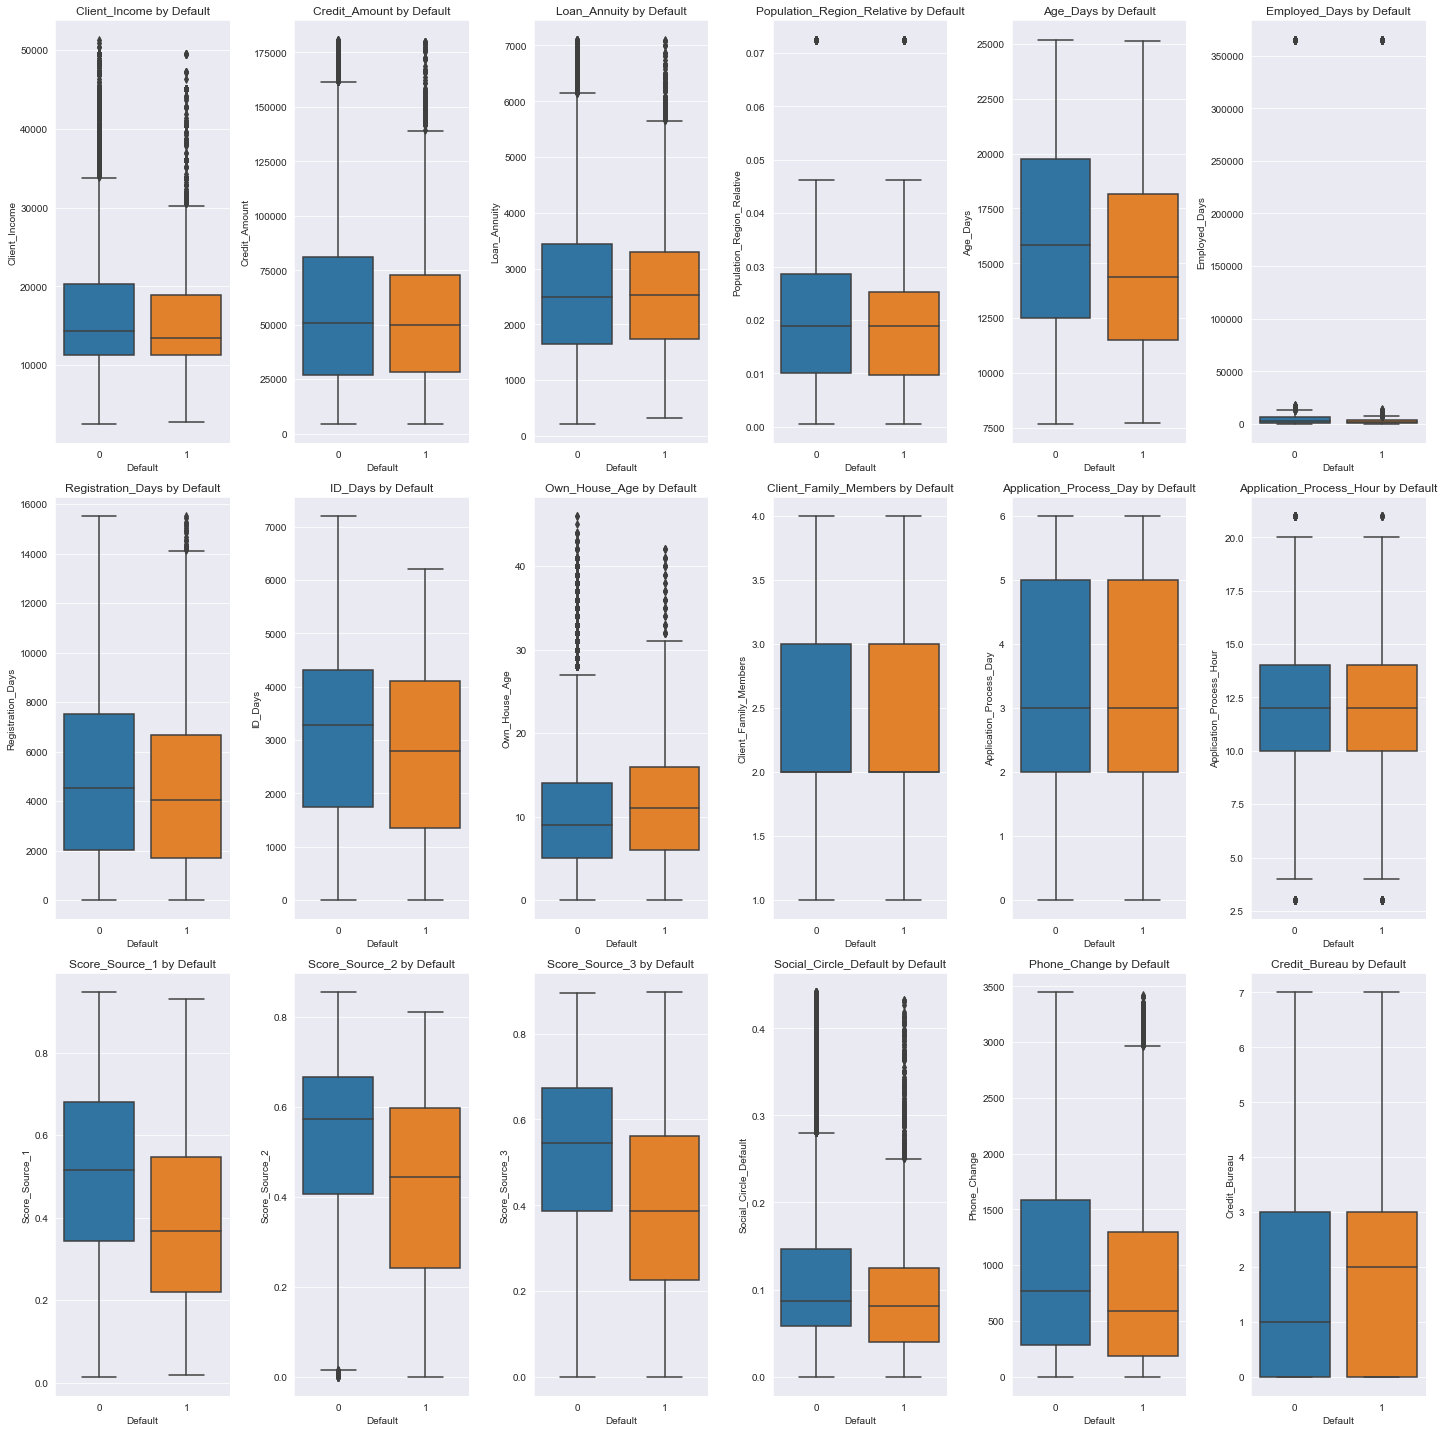

In [659]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(20, 20))

quantitative_columns = [
    'Client_Income', 'Credit_Amount', 'Loan_Annuity', 'Population_Region_Relative', 
    'Age_Days', 'Employed_Days', 'Registration_Days', 'ID_Days', 'Own_House_Age', 
    'Client_Family_Members', 'Application_Process_Day', 
    'Application_Process_Hour', 'Score_Source_1', 'Score_Source_2', 'Score_Source_3', 
    'Social_Circle_Default', 'Phone_Change', 'Credit_Bureau'
]

for i, col in enumerate(quantitative_columns):
    if i < 18: 
        sns.boxplot(x=data['Default'], y=data[col], ax=axes[i//6, i%6])
        axes[i//6, i%6].set_title(f"{col} by Default")

plt.tight_layout()
plt.show()

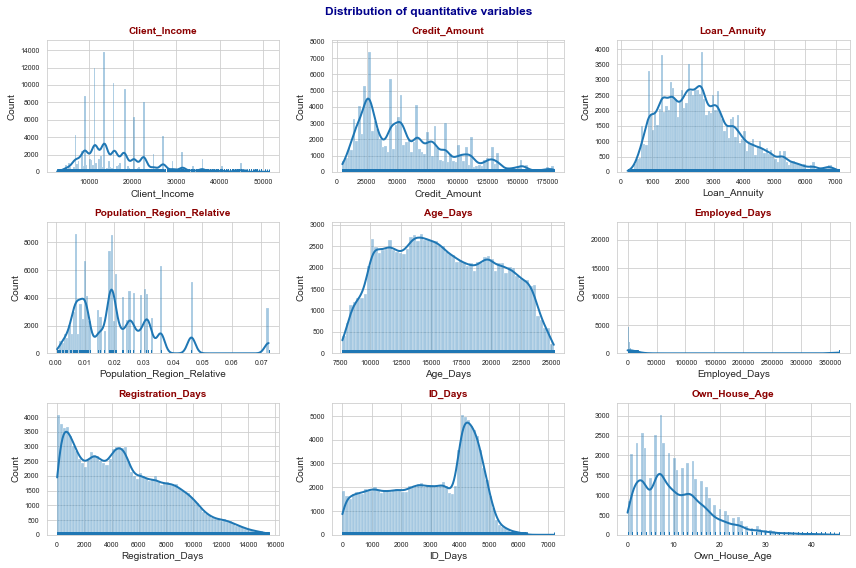

In [660]:

sns.set_style("whitegrid")
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))
axes = axes.flat

quantitative_columns = [
    'Client_Income', 'Credit_Amount', 'Loan_Annuity', 'Population_Region_Relative', 
    'Age_Days', 'Employed_Days', 'Registration_Days', 'ID_Days', 'Own_House_Age', 
    'Client_Family_Members', 'Application_Process_Day', 
    'Application_Process_Hour', 'Score_Source_1', 'Score_Source_2', 'Score_Source_3', 
    'Social_Circle_Default', 'Phone_Change', 'Credit_Bureau'
]


for i, col in enumerate(quantitative_columns):
    if i < 9:  # Limiting to 9 plots to fit in the available subplots
        sns.histplot(data[col], stat="count", kde=True, line_kws={"linewidth": 2.0}, alpha=0.4, ax=axes[i])
        sns.rugplot(data[col], ax=axes[i])

        axes[i].set_title(f"{col}", fontsize=10, fontweight="bold", color="darkred")
        axes[i].tick_params(labelsize=7)

fig.suptitle("Distribution of quantitative variables", fontsize=12, fontweight="bold", color="darkblue")
fig.tight_layout()
plt.show()

In [661]:
# Concatenating all of the columns
X_train_preprocessed = np.hstack((X_train_numeric_imputed, X_train_categorical_encoded.values))
X_test_preprocessed = np.hstack((X_test_numeric_imputed, X_test_categorical_encoded.values))

In [662]:
X_train_preprocessed

array([[1.57500000e+04, 1.00000000e+00, 0.00000000e+00, ...,
        7.73239114e-02, 7.68581926e-02, 9.13180817e-02],
       [1.35000000e+04, 1.00000000e+00, 1.00000000e+00, ...,
        7.73239114e-02, 7.68581926e-02, 9.13180817e-02],
       [2.02500000e+04, 0.00000000e+00, 0.00000000e+00, ...,
        7.73239114e-02, 9.97264200e-02, 7.10508923e-02],
       ...,
       [8.10000000e+03, 0.00000000e+00, 1.00000000e+00, ...,
        7.73239114e-02, 7.68581926e-02, 5.46381244e-02],
       [3.37500000e+04, 0.00000000e+00, 0.00000000e+00, ...,
        7.73239114e-02, 7.68581926e-02, 9.13180817e-02],
       [3.60000000e+04, 0.00000000e+00, 0.00000000e+00, ...,
        7.73239114e-02, 9.97264200e-02, 9.13180817e-02]])

In [663]:
class_distribution = pd.Series(y_train).value_counts()
print("Class Distribution:")
print(class_distribution)

Class Distribution:
0    78392
1     6907
Name: Default, dtype: int64


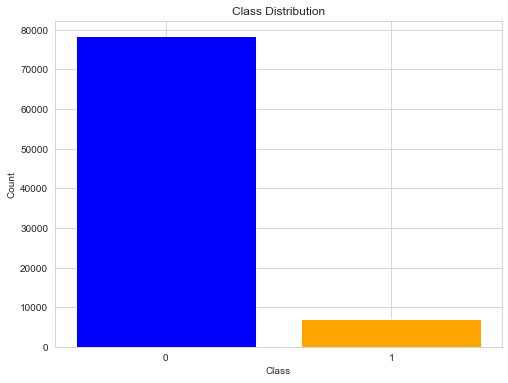

In [664]:
plt.figure(figsize=(8, 6))
plt.bar(class_distribution.index, class_distribution.values, color=['blue', 'orange'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(class_distribution.index)
plt.show()

In [665]:
# Handling imbalanced data 
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_preprocessed, y_train)

In [666]:
# Assuming y_train contains the target variable
class_distribution = pd.Series(y_train_resampled).value_counts()
print("Class Distribution:")
print(class_distribution)

Class Distribution:
1    78392
0    78392
Name: Default, dtype: int64


In [667]:
data_types = np.array([type(elem) for elem in X_test_preprocessed])

# check categorical values in data
has_categorical = np.any((data_types == str) | (data_types == object))
print("c0ntians categorical values:", has_categorical)

c0ntians categorical values: False


In [668]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test_preprocessed)

In [669]:
# Model training
class_weights = {0: 1, 1: 1.3}
model = RandomForestClassifier(bootstrap=False, max_depth=3, max_features='log2',
                       min_samples_leaf=9, min_samples_split=8,
                       n_estimators=160, random_state=42,class_weight=class_weights)
model.fit(X_train_scaled, y_train_resampled)

# Best F1-score: 0.21454928835002635
# Best parameters: {'n_estimators': 118, 'max_depth': 3, 'min_samples_split': 14, 'min_samples_leaf': 9, 'max_features': 'auto', 'bootstrap': False}

RandomForestClassifier(bootstrap=False, class_weight={0: 1, 1: 1.3},
                       max_depth=3, max_features='log2', min_samples_leaf=9,
                       min_samples_split=8, n_estimators=160, random_state=42)

In [670]:
# evaluation
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.6525426046995103


In [671]:
# Reports
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.66      0.78     33619
           1       0.13      0.61      0.22      2938

    accuracy                           0.65     36557
   macro avg       0.54      0.63      0.50     36557
weighted avg       0.89      0.65      0.73     36557

Confusion Matrix:
[[22052 11567]
 [ 1135  1803]]


### Inferences
The most crutial task for this type of problem is to find the loan defaulters, so i am concentrating more on the recall rather then precision and this can only be acheived by either compromising the precision and class 0 metrics (both precision and recall) or doing the experiments with feature engineering and modelling.

Precision: For class 0, the precision is 0.95, meaning that 95% of instances predicted as class 0 are actually class 0. For class 1, the precision is 0.13, indicating that only 13% of instances predicted as class 1 are actually class 1.

Recall: The recall for class 0 is 0.66, suggesting that 66% of actual class 0 instances are correctly predicted as class 0. For class 1, the recall is 0.61, meaning that 61% of actual class 1 instances are correctly predicted as class 1.

In [672]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train_resampled)
# evaluation
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9279754903301694


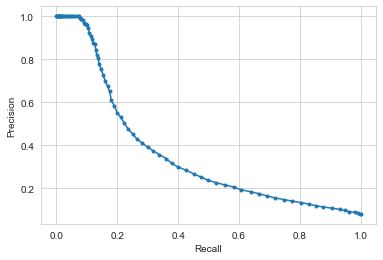

In [673]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

y_probabilities = model.predict_proba(X_test_scaled)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_probabilities)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()

In [674]:
f1_scores = 2 * (precision * recall) / (precision + recall)

# Find the index of the threshold that maximizes the F1-score
best_threshold_index = np.argmax(f1_scores)

# Retrieve the best threshold and corresponding precision and recall
best_threshold = thresholds[best_threshold_index]
best_precision = precision[best_threshold_index]
best_recall = recall[best_threshold_index]

print(f"Best Threshold: {best_threshold}")
print(f"Best Precision: {best_precision}")
print(f"Best Recall: {best_recall}")

Best Threshold: 0.28
Best Precision: 0.3375715193897012
Best Recall: 0.36147038801906056


In [675]:
chosen_threshold = best_threshold

# Classify instances based on chosen threshold
y_pred_adjusted = (y_probabilities >= chosen_threshold).astype(int)

# Printing updated classification report and confusion matrix
print("Classification Report with Adjusted Threshold:")
print(classification_report(y_test, y_pred_adjusted))
print("Confusion Matrix with Adjusted Threshold:")
print(confusion_matrix(y_test, y_pred_adjusted))

Classification Report with Adjusted Threshold:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     33619
           1       0.34      0.36      0.35      2938

    accuracy                           0.89     36557
   macro avg       0.64      0.65      0.65     36557
weighted avg       0.90      0.89      0.89     36557

Confusion Matrix with Adjusted Threshold:
[[31535  2084]
 [ 1876  1062]]


### Inferences

Precision: For class 0, the precision is 0.94, indicating that 94% of the instances predicted as class 0 are actually class 0. For class 1, the precision is 0.34, meaning that 34% of the instances predicted as class 1 are actually class 1.

Recall: The recall for class 0 is 0.94, indicating that 94% of the actual class 0 instances are correctly predicted as class 0. For class 1, the recall is 0.36, meaning that 36% of the actual class 1 instances are correctly predicted as class 1.

# Experiments

In [ ]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def objective(trial):
    # search space for hyperparameters
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2']),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False])
    }
    
    rf_classifier = RandomForestClassifier(**params, random_state=42)
    
    rf_classifier.fit(X_train_scaled, y_train_resampled)
    
    y_pred = rf_classifier.predict(X_test_scaled)
    
    f1 = f1_score(y_test, y_pred)
    
    return f1



study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

best_params = study.best_params
best_f1 = study.best_value

print("Best F1-score:", best_f1)
print("Best parameters:", best_params)

# Training the final model with the best hyperparameters
final_model = RandomForestClassifier(**best_params, random_state=42)
final_model.fit(X_train_scaled, y_train_resampled)


[I 2024-04-13 20:31:44,199] A new study created in memory with name: no-name-3b69e9dd-a5f8-44da-80fd-f82bea1781d2
[I 2024-04-13 20:32:05,462] Trial 0 finished with value: 0.2314574994113492 and parameters: {'n_estimators': 83, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': 'log2', 'bootstrap': False}. Best is trial 0 with value: 0.2314574994113492.
[I 2024-04-13 20:32:42,695] Trial 1 finished with value: 0.2260631683660781 and parameters: {'n_estimators': 172, 'max_depth': 5, 'min_samples_split': 15, 'min_samples_leaf': 10, 'max_features': 'log2', 'bootstrap': True}. Best is trial 0 with value: 0.2314574994113492.
[I 2024-04-13 20:33:09,700] Trial 2 finished with value: 0.08252853380158033 and parameters: {'n_estimators': 51, 'max_depth': 15, 'min_samples_split': 19, 'min_samples_leaf': 4, 'max_features': 'auto', 'bootstrap': True}. Best is trial 0 with value: 0.2314574994113492.


In [ ]:
# # Model training
# model = RandomForestClassifier(max_depth=3, min_samples_leaf=3, min_samples_split=9,
#                        n_estimators=67, random_state=42)
# model.fit(X_train_scaled, y_train_resampled)

# Model evaluation
y_pred = final_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Classification report and confusion matrix
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

classifier = RandomForestClassifier(random_state=42)

n_folds = 5  

cv_splitter = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

cv_scores = cross_val_score(classifier, X_train_scaled, y_train_resampled, cv=cv_splitter, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print the mean and standard deviation of the cross-validation scores
print("Mean accuracy:", cv_scores.mean())
print("Standard deviation of accuracy:", cv_scores.std())

In [ ]:
import xgboost as xgb

# XGBoost model training (hyperparameter are taken after tunning)
xgb_model = xgb.XGBClassifier(max_depth= 9, learning_rate= 0.26154888739884047, n_estimators= 906, random_state=42)
xgb_model.fit(X_train_scaled, y_train_resampled)
# Model evaluation
y_pred = xgb_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

In [ ]:
# Classification report and confusion matrix
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

In [ ]:
from catboost import CatBoostClassifier

# CatBoost model training
class_weights = [1, 5]
catboost_model = CatBoostClassifier(random_state=42, verbose=False,class_weights=class_weights)
catboost_model.fit(X_train_scaled, y_train_resampled)
y_pred = catboost_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

In [ ]:
# Classification report and confusion matrix
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

In [ ]:
import lightgbm as lgb

# LightGBM model training
lgb_model = lgb.LGBMClassifier(random_state=42, is_unbalance=True)
lgb_model.fit(X_train_scaled, y_train_resampled)
y_pred = lgb_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

In [ ]:
# Classification report and confusion matrix
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

In [ ]:
import optuna
import xgboost as xgb
from catboost import CatBoostClassifier
import lightgbm as lgb

# Define the objective function for XGBoost
def xgb_objective(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'random_state': 42
    }
    xgb_model = xgb.XGBClassifier(**params)
    xgb_model.fit(X_train_scaled, y_train_resampled)

    y_pred = xgb_model.predict(X_test_scaled)
    
    f1 = f1_score(y_test, y_pred)
    
    return f1

# Define the objective function for CatBoost
def catboost_objective(trial):
    params = {
        'depth': trial.suggest_int('depth', 3, 10),
        'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'random_state': 42,
        'verbose': False
    }
    catboost_model = CatBoostClassifier(**params)
    catboost_model.fit(X_train_scaled, y_train_resampled)
    y_pred = catboost_model.predict(X_test_scaled)
    
    f1 = f1_score(y_test, y_pred)
    
    return f1

# Define the objective function for LightGBM
def lgb_objective(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'random_state': 42
    }
    lgb_model = lgb.LGBMClassifier(**params)
    lgb_model.fit(X_train_scaled, y_train_resampled)
    y_pred = lgb_model.predict(X_test_scaled)
    
    f1 = f1_score(y_test, y_pred)
    
    return f1


In [ ]:
# for XGBoost
xgb_study = optuna.create_study(direction='maximize')
xgb_study.optimize(xgb_objective, n_trials=10)

best_xgb_params = xgb_study.best_params

best_xgb_model = xgb.XGBClassifier(**best_xgb_params)
best_xgb_model.fit(X_train_preprocessed, y_train_resampled)

In [ ]:
# for CatBoost
catboost_study = optuna.create_study(direction='maximize')
catboost_study.optimize(catboost_objective, n_trials=10)

best_catboost_params = catboost_study.best_params

best_catboost_model = CatBoostClassifier(**best_catboost_params, verbose=False)
best_catboost_model.fit(X_train_preprocessed, y_train_resampled)


In [ ]:
# for LightGBM
lgb_study = optuna.create_study(direction='maximize')
lgb_study.optimize(lgb_objective, n_trials=10)

best_lgb_params = lgb_study.best_params

best_lgb_model = lgb.LGBMClassifier(**best_lgb_params)
best_lgb_model.fit(X_train_preprocessed, y_train_resampled)